In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f0_sol_eqq_eqpi(p,q,l):
    # coefs second degree polynomial: ax**2 + bx + c = 0
    r = 1/q
    a = -l
    b = 2*p*(1-l)+l+r
    c = -r
    # folution to f0:
    root = np.sqrt(b**2-4*a*c)
    f0_1 = (-b+root)/(2*a)
    f0_2 = (-b-root)/(2*a)
    return f0_1, f0_2

In [42]:
pi = 1e-10
q = 10
l = 0.09999
print(f0_sol_eqq_eqpi(pi,q,l))


(0.9999844254908339, 1.0001155863103666)


In [37]:
# solution obtained making the epsilon approximation:
def f0_aprox1(p,q,l):
    r = 1/q
    return 1 + 2*(1-l)*p/(l-r)

def f0_aprox1_stab(p,q,l):
    r = 1/q
    try:
        func = l-r+2*p*(1-l)*(l+r)/(l-r)
    except ZeroDivisionError:
        print(f'Divide by 0 encountered when p, q, l: {p}, {q}, {l}')
        func = 0.0
    return func

def f0_aproxrl(p,q,l):
    r = 1/q
    return r/l*(1-2*(1-l)*p/(l-r))

def f0_aproxrl_stab(p,q,l):
    r = 1/q
    func = -(l-r+2*p*(1-l)*(l+r)/(l-r))
    return func

In [38]:
print(f0_aprox1(pi,q,l), f0_aprox1_stab(pi,q,l))
print(f0_aproxrl(pi,q,l), f0_aproxrl_stab(pi,q,l))

0.9981999800000018 -0.00036998599979965
1.0019002100210004 0.00036998599979965


#### The approx solution f0=1 coincides with the complete solution when pi->0 !

##### For small lambda, lambda < r:

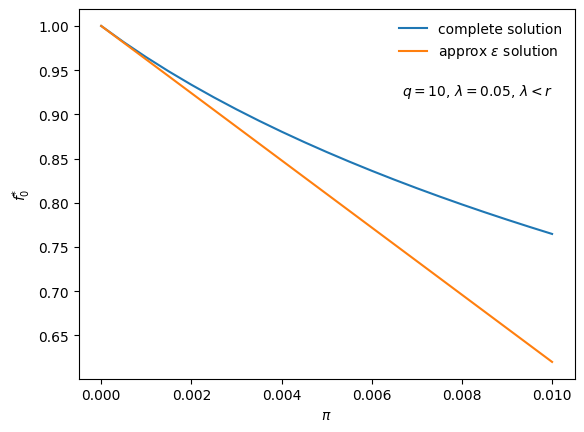

In [43]:
q, l = 10, 0.05
pi = np.linspace(0.0, 0.01, 21)
# pi = np.logspace(-3, -2, 30)

f0_full = []
f0_approx = []

for p in pi:
    f0_full.append(f0_sol_eqq_eqpi(p,q,l)[0])
    f0_approx.append(f0_aprox1(p,q,l))

fig, ax = plt.subplots()
ax.plot(pi, f0_full, label='complete solution')
ax.plot(pi, f0_approx, label=r'approx $\varepsilon$ solution')
# ax.set_xscale('symlog')
ax.set_xlabel(r'$\pi$')
ax.set_ylabel(r'$f_0^{*}$')
fig.text(0.63,0.7,f'$q = {q}$, $\lambda = {l}$, $\lambda < r$')
ax.legend(frameon=False)
fig.savefig(f'compare_f0_sols_eqq_eqpi_q_{q}_l_{l}.png')

##### ... and for lambda > r:

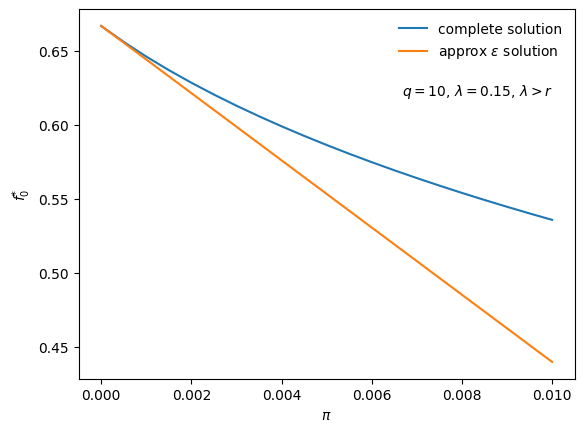

In [44]:
q, l = 10, 0.15
pi = np.linspace(0.0, 0.01, 21)

f0_full = []
f0_approx = []

for p in pi:
    f0_full.append(f0_sol_eqq_eqpi(p,q,l)[0])
    f0_approx.append(f0_aproxrl(p,q,l))

fig, ax = plt.subplots()
ax.plot(pi, f0_full, label='complete solution')
ax.plot(pi, f0_approx, label=r'approx $\varepsilon$ solution')
ax.set_xlabel(r'$\pi$')
ax.set_ylabel(r'$f_0^{*}$')
fig.text(0.63,0.7,f'$q = {q}$, $\lambda = {l}$, $\lambda > r$')
ax.legend(frameon=False)
fig.savefig(f'compare_f0_sols_eqq_eqpi_q_{q}_l_{l}.png')

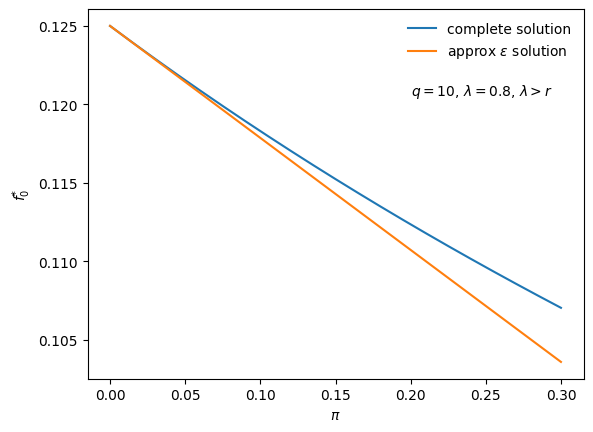

In [45]:
q, l = 10, 0.8
pi = np.linspace(0.0, 0.3, 21)

f0_full = []
f0_approx = []

for p in pi:
    f0_full.append(f0_sol_eqq_eqpi(p,q,l)[0])
    f0_approx.append(f0_aproxrl(p,q,l))

fig, ax = plt.subplots()
ax.plot(pi, f0_full, label='complete solution')
ax.plot(pi, f0_approx, label=r'approx $\varepsilon$ solution')
ax.set_xlabel(r'$\pi$')
ax.set_ylabel(r'$f_0^{*}$')
fig.text(0.63,0.7,f'$q = {q}$, $\lambda = {l}$, $\lambda > r$')
ax.legend(frameon=False)
fig.savefig(f'compare_f0_sols_eqq_eqpi_q_{q}_l_{l}.png')